In [ ]:
import sys
sys.path.append('../SDF/utilities')
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

In [12]:
# load data
data = sh.getdata(50,verbose=False)

In [3]:
# list variables
print("Variables in the data file:")
sh.list_variables(data)

Variables in the data file:
CPU_split_Left <class 'sdf.BlockPlainVariable'> [9]
CPU_split_Right <class 'sdf.BlockPlainVariable'> [9]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [8]
Current_Jx <class 'sdf.BlockPlainVariable'> [400]
Derived_Average_Particle_Energy <class 'sdf.BlockPlainVariable'> [400]
Derived_Charge_Density <class 'sdf.BlockPlainVariable'> [400]
Derived_Number_Density <class 'sdf.BlockPlainVariable'> [400]
Derived_Number_Density_Left <class 'sdf.BlockPlainVariable'> [400]
Derived_Number_Density_Right <class 'sdf.BlockPlainVariable'> [400]
Derived_Temperature <class 'sdf.BlockPlainVariable'> [400]
Derived_Temperature_Left <class 'sdf.BlockPlainVariable'> [400]
Derived_Temperature_Right <class 'sdf.BlockPlainVariable'> [400]
Electric_Field_Ex <class 'sdf.BlockPlainVariable'> [400]
Electric_Field_Ey <class 'sdf.BlockPlainVariable'> [400]
Electric_Field_Ez <class 'sdf.BlockPlainVariable'> [400]
Grid_CPU_split_Le

(-6e-24, 6e-24)

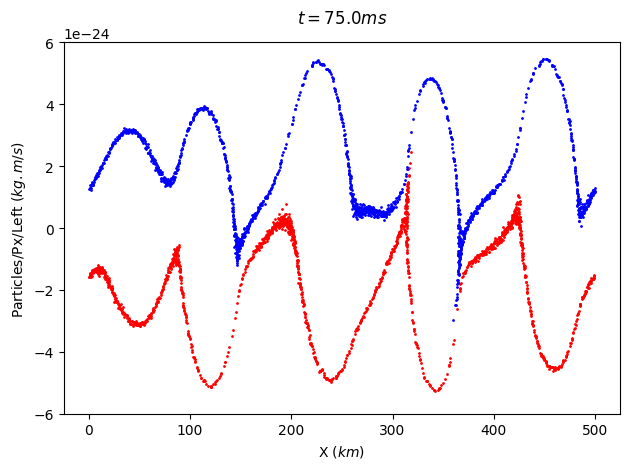

In [ ]:
# plot the data
plt.ion()
sh.plot1d(data.Particles_Px_Left, 'r.',ms=2,yscale=1)
sh.oplot1d(data.Particles_Px_Right, 'b.',ms=2,yscale=1)
plt.ylim([-6e-24,6e-24])

In [ ]:
# 循环读取并绘图保存
for n in range(0, 101):
    try:
        # 读取数据
        data = sh.getdata(n,verbose=False)

        # 清空当前图像，避免叠加
        plt.clf()
        plt.ion()

        # 绘图
        sh.plot1d(data.Particles_Px_Left, 'r.', ms=2, yscale=1)
        sh.oplot1d(data.Particles_Px_Right, 'b.', ms=2, yscale=1)
        plt.ylim([-6e-24, 6e-24])

        # 保存图像
        plt.savefig(f"./Data/2stream/{n:04d}.png", dpi=300)  # 用4位数编号
        print(f"Saved frame {n}")

    except Exception as e:
        print(f"Error at frame {n}: {e}")